## Translation stats

This notebook analyses data from the c3lingo organization pads, as well as the fahrplan, in order to provide some stats about translation.

Created by github.com/sasha42

In [1]:
# imports
import pandas as pd
import requests
import matplotlib

# Get data from pads
First of all, we will get data from the pads. This was already done using a hacked `main.py` file which saved data into a csv.

In [2]:
# read csv that was saved by main.py
df = pd.read_csv('translation.csv')

Let's take a look at the shape of this data...

In [3]:
df.head()

,Unnamed: 0,name,language,talk.translation_shifts,talk.language,talk.room,talk.duration,talk.title,talk.speakers,talk.fahrplan
0,0,waffle,en,"[TranslationShift(name=""waffle"", language=""en""...",de,Ada,0 days 00:30:00.000000000,Opening Ceremony (de),"['bleeptrack', 'blinry']",https://fahrplan.events.ccc.de/congress/2019/F...
1,1,SimplySayM,en,"[TranslationShift(name=""waffle"", language=""en""...",de,Ada,0 days 00:30:00.000000000,Opening Ceremony (de),"['bleeptrack', 'blinry']",https://fahrplan.events.ccc.de/congress/2019/F...
2,2,bluewhobert,en,"[TranslationShift(name=""waffle"", language=""en""...",de,Ada,0 days 00:30:00.000000000,Opening Ceremony (de),"['bleeptrack', 'blinry']",https://fahrplan.events.ccc.de/congress/2019/F...
3,3,ironic,fr,"[TranslationShift(name=""waffle"", language=""en""...",de,Ada,0 days 00:30:00.000000000,Opening Ceremony (de),"['bleeptrack', 'blinry']",https://fahrplan.events.ccc.de/congress/2019/F...
4,4,hnms,fr,"[TranslationShift(name=""waffle"", language=""en""...",de,Ada,0 days 00:30:00.000000000,Opening Ceremony (de),"['bleeptrack', 'blinry']",https://fahrplan.events.ccc.de/congress/2019/F...


Great, let's quickly look at how many people participated in the translation effort:

In [4]:
df.groupby('name').agg('count')

,Unnamed: 0,language,talk.translation_shifts,talk.language,talk.room,talk.duration,talk.title,talk.speakers,talk.fahrplan
name,,,,,,,,,
@bitnapper,1,1,1,1,1,1,1,1,1
Aegy,7,7,7,7,7,7,7,7,7
André,4,4,4,4,4,4,4,4,4
Bayden,2,2,2,2,2,2,2,2,2
Ben,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...
whytea,4,4,4,4,4,4,4,4,4
yann0u,3,3,3,3,3,3,3,3,3
yila,5,5,5,5,5,5,5,5,5


In [5]:
print(f"There were {df.groupby('name').agg('count').shape[0]} people who translated")

There were 129 people who translated


Ok, now let's look at the rooms in which the translations occured. We will drop WikiPaka translations because we don't have the raw data from the fahrplan (coming in the next section).

In [6]:
# look at the rooms that are present
df.groupby('talk.room').agg('count')

,Unnamed: 0,name,language,talk.translation_shifts,talk.language,talk.duration,talk.title,talk.speakers,talk.fahrplan
talk.room,,,,,,,,,
Ada,145,145,145,145,145,145,145,145,145
Borg,143,143,143,143,143,143,143,143,143
Clarke,146,146,146,146,146,146,146,146,146
Dijkstra,126,126,126,126,126,126,126,126,126
Eliza,115,115,115,115,115,115,115,115,115
WikiPaka WG: Bibliothek,1,1,1,1,1,1,1,1,1
WikiPaka WG: Esszimmer,54,54,54,54,54,54,54,54,54


In [7]:
# drop WikiPaka because we don't have equivalent fahrplan data
df = df[df['talk.room'] != 'WikiPaka WG: Esszimmer']
df = df[df['talk.room'] != 'WikiPaka WG: Bibliothek']

Let's count how many talks were translated in general:

In [8]:
df.groupby('talk.title').agg('count')

,Unnamed: 0,name,language,talk.translation_shifts,talk.language,talk.room,talk.duration,talk.speakers,talk.fahrplan
talk.title,,,,,,,,,
"""Hacker hin oder her"": Die elektronische Patientenakte kommt!",3,3,3,3,3,3,3,3,3
#NoPNR – Let’s kill the next Data Retention Law,5,5,5,5,5,5,5,5,5
#mifail oder: Mit Gigaset wäre das nicht passiert!,3,3,3,3,3,3,3,3,3
(Post-Quantum) Isogeny Cryptography,4,4,4,4,4,4,4,4,4
15 Jahre deutsche Telematikinfrastruktur (TI),2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
Wifibroadcast,4,4,4,4,4,4,4,4,4
Wohnungsbot: An Automation-Drama in Three Acts,4,4,4,4,4,4,4,4,4
ZombieLoad Attack,2,2,2,2,2,2,2,2,2


In [9]:
print(f"There were {df.groupby('talk.title').agg('count').shape[0]} talks in the translation pad")

There were 161 talks in the translation pad


In [10]:
print(f'There were {df[df["name"].isnull()].shape[0]} talks without translations')

There were 0 talks without translations


Now let's look at the languages which we translated into:

In [11]:
# group by language and talk so we get uniques for each language
uniq_languages = df.groupby(['language', 'talk.title']).agg('count').groupby('language').agg('count')
uniq_languages[['name']]

,name
language,
de,104
en,57
es,23
fr,59
pl,8
ru,14
swabi,1


In [12]:
uniq_languages[['name']].plot.bar()

Great, now let's clean up the dataframe a little bit so that we can play with it further down...

In [13]:
# create new column for unique name of language + translation
df["title-language"] = df["talk.title"] + df["language"]

# drop duplicate translations (there were multiple people translating per talk)
df = df.drop_duplicates(subset='title-language', keep="first")

# Get data from all talks

Now that we have some clean data from our c3lingo organizational pads, let's pull data from the fahrplan and get it ready for analysis:

In [14]:
# get schedule from fahrplan
resp = requests.get('https://fahrplan.events.ccc.de/congress/2019/Fahrplan/schedule.json')

# parse the json
fahrplan_json = resp.json()

# get the days
talk_days = fahrplan_json['schedule']['conference']['days']

In [15]:
str(talk_days)[:1000]

"[{'index': 1, 'date': '2019-12-27', 'day_start': '2019-12-27T11:00:00+01:00', 'day_end': '2019-12-28T04:00:00+01:00', 'rooms': {'Ada': [{'url': 'https://fahrplan.events.ccc.de/congress/2019/Fahrplan/events/11223.html', 'id': 11223, 'guid': '6a32cb72-a69d-423c-91b5-60d88eb8e6c7', 'logo': None, 'date': '2019-12-27T11:00:00+01:00', 'start': '11:00', 'duration': '00:30', 'room': 'Ada', 'slug': '36c3-11223-opening_ceremony', 'title': 'Opening Ceremony', 'subtitle': '', 'track': 'CCC', 'type': 'lecture', 'language': 'de', 'abstract': 'Welcome!', 'description': '', 'recording_license': '', 'do_not_record': False, 'persons': [{'id': 9891, 'public_name': 'bleeptrack'}, {'id': 6697, 'public_name': 'blinry'}], 'links': [], 'attachments': []}, {'url': 'https://fahrplan.events.ccc.de/congress/2019/Fahrplan/events/11220.html', 'id': 11220, 'guid': '3aae5c0a-9c9b-483a-8c09-b4402d749a82', 'logo': None, 'date': '2019-12-27T11:30:00+01:00', 'start': '11:30', 'duration': '01:00', 'room': 'Ada', 'slug': 

Wunderbar. We now pulled the data from the fahrplan API, but it's not in a nice format yet. We will parse each day to extract data and put it into a nice dataframe:

In [16]:
def parse_day(day):
    """Parses a single day json and exports a dataframe
    with all the talks that day"""
    
    # create an empty DataFrame
    df = pd.DataFrame()
    
    # start looking at all the rooms
    rooms = day['rooms']
    
    # iterate over all the rooms
    for room in rooms:
        # convert to DataFrame
        single_room = pd.DataFrame(rooms[room])
    
        # append to DataFrame
        df = pd.concat([df,single_room])
    
    # return DataFrame
    return df

In [17]:
# create an empty DataFrame
fahrplan = pd.DataFrame()
    
for day in range(len(talk_days)):
    # parse a single day
    day_df = parse_day(talk_days[day])
    
    # append to DataFrame
    fahrplan = pd.concat([fahrplan,day_df])
    
    print(f'Parsed day {day}')

Parsed day 0
Parsed day 1
Parsed day 2
Parsed day 3


In [18]:
fahrplan.describe()

,id
count,162.000000
mean,10859.691358
std,221.927728
min,10496.000000
25%,10678.250000
50%,10877.000000
75%,11009.500000
max,11310.000000


In [19]:
print(f'There were {int(fahrplan.describe()["id"]["count"])} talks in the big rooms')

There were 162 talks in the big rooms


Fantastic, we've cleaned up our data now, and can go onto the analysis.

# Analysis
Here was the requested data:

    100% de -> en
    100% de -> fr
    X% talks to fr
    Y talks to ru
    Z% of taks in pl
    K% of isage of the second channel
    L minutes translated into spanish

Extra stuff:

    How many talks were available in German
    How many of English talks were translated into German
    Which talks have no translation?

In [20]:
talks = fahrplan.shape[0]
print(f'There were {talks} talks')

There were 162 talks


First we will look at what percentage of talks have translations..

In [21]:
# get german to english translations
f_german = fahrplan[fahrplan['language'] == 'de']
german_talks = f_german.shape[0]
german_translations = df[(df['talk.language'] == 'de') & (df['language'] == 'en')].shape[0] # only into english
german_tr_per = round((german_translations/german_talks)*100,2)

print('\033[1m' + f'{german_tr_per}% de -> en' + '\033[0m')
print(f'There were {german_talks} talks in German, {german_translations} ({german_tr_per}%) of which were translated to English.')

98.28% de -> en
There were 58 talks in German, 57 (98.28%) of which were translated to English.


In [22]:
# get german to french translations
german_translations_fr = df[(df['talk.language'] == 'de') & (df['language'] == 'fr')].shape[0]
german_tr_per_fr = round((german_translations_fr/german_talks)*100,2)

print('\033[1m' + f'{german_tr_per_fr}% de -> fr' + '\033[0m')
print(f'{german_translations_fr} ({german_tr_per_fr}%) of German talks were translated to French.')

27.59% de -> fr
16 (27.59%) of German talks were translated to French.


In [23]:
# get any to french translations
any_translations_fr = df[df['language'] == 'fr'].shape[0]
fr_perc = round((any_translations_fr/talks)*100,2)

print('\033[1m' + f'{fr_perc}% talks to fr' + '\033[0m')
print(f'There were {any_translations_fr} ({fr_perc}%) talks translated to French.')

36.42% talks to fr
There were 59 (36.42%) talks translated to French.


In [24]:
# get any to russian translations
any_translations_ru = df[df['language'] == 'ru'].shape[0]
ru_perc = round((any_translations_ru/talks)*100,2)

print('\033[1m' + f'{ru_perc}% talks to ru' + '\033[0m')
print(f'There were {any_translations_ru} ({ru_perc}%) talks translated to Russian.')

8.64% talks to ru
There were 14 (8.64%) talks translated to Russian.


In [25]:
# get any to polish translations
any_translations_pl = df[df['language'] == 'pl'].shape[0]
pl_perc = round((any_translations_pl/talks)*100,2)

print('\033[1m' + f'{pl_perc}% talks to pl' + '\033[0m')
print(f'There were {any_translations_pl} ({pl_perc}%) talks translated to Polish.')

4.94% talks to pl
There were 8 (4.94%) talks translated to Polish.


In [26]:
# get any to spanish translations
any_translations_es = df[df['language'] == 'es'].shape[0]
es_perc = round((any_translations_es/talks)*100,2)

print('\033[1m' + f'{es_perc}% talks to es' + '\033[0m')
print(f'There were {any_translations_es} ({es_perc}%) talks translated to Spanish.')

14.2% talks to es
There were 23 (14.2%) talks translated to Spanish.


In [27]:
# get any to swabi translations
any_translations_swabi = df[df['language'] == 'swabi'].shape[0]
swabi_perc = round((any_translations_swabi/talks)*100,2)

print('\033[1m' + f'{swabi_perc}% talks to swabi' + '\033[0m')
print(f'There were {any_translations_swabi} ({swabi_perc}%) talks translated to swabi.')

0.62% talks to swabi
There were 1 (0.62%) talks translated to swabi.


Then we'll look at utilization stats...

In [28]:
languages = df.groupby(['talk.title', 'language']).agg('count').reset_index().groupby('talk.title').agg('count')[['language']]

In [29]:
languages.head()

,language
talk.title,
"""Hacker hin oder her"": Die elektronische Patientenakte kommt!",1
#NoPNR – Let’s kill the next Data Retention Law,2
#mifail oder: Mit Gigaset wäre das nicht passiert!,1
(Post-Quantum) Isogeny Cryptography,2
15 Jahre deutsche Telematikinfrastruktur (TI),1


In [30]:
avg_channels = round(languages.describe()['language']['mean'], 2)

second_channel = languages[languages.language > 1].shape[0]

second_channel_perc = round((second_channel/talks)*100)

print('\033[1m' + f'{second_channel_perc}% of usage of the second channel' + '\033[0m')
print(f'The average talk had {avg_channels} translation channels, with {second_channel_perc}% of talks having a second channel.')

65% of usage of the second channel
The average talk had 1.65 translation channels, with 65% of talks having a second channel.


Next we'll try to find some talks that are missing translations. Note that this part isn't the ideal solution, but it worked to identify the missing talk.

In [31]:
# which talks have no translation?
# todo: cleanup, the right talk was found here but it's not a good solution
original_talks = fahrplan_list = fahrplan['url']
translated_talks = list(df['talk.fahrplan'])

list(set(original_talks).difference(translated_talks))

['https://fahrplan.events.ccc.de/congress/2019/Fahrplan/events/10677.html',
 'https://fahrplan.events.ccc.de/congress/2019/Fahrplan/events/10859.html',
 'https://fahrplan.events.ccc.de/congress/2019/Fahrplan/events/10936.html',
 'https://fahrplan.events.ccc.de/congress/2019/Fahrplan/events/11113.html']

Fantastic. Now let's look at the number of minutes that were translated for each language. This is a bit tricky since the datetime is saved into a string, so we'll need to parse it first.

In [32]:
def count_minutes(duration):
    """Takes the duration string and return minutes in int"""
    
    # split days and hours
    translation_time = duration.split(' ')[2]
    
    # get hours
    hours = int(translation_time.split(':')[0])
    
    # calc minutes in hours
    hours_minutes = hours*60
    
    # calc minutes
    minutes = int(translation_time.split(':')[1])
    
    # calculate hours + minutes so we get actual minutes
    final_minutes = hours_minutes + minutes
    
    return final_minutes

In [33]:
# compute minutes of translation for each talk
df['translation.minutes'] = df['talk.duration'].apply(lambda x: count_minutes(x))

In [34]:
df.groupby('language').agg('sum')[['translation.minutes']]

,translation.minutes
language,
de,5890
en,3250
es,1330
fr,3600
pl,360
ru,700
swabi,60


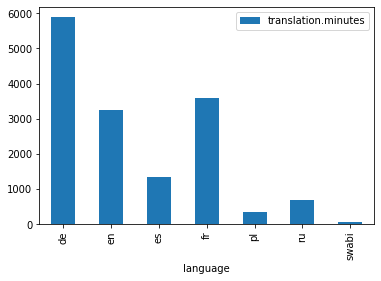

In [35]:
df.groupby('language').agg('sum')[['translation.minutes']].plot.bar()

In [36]:
print(f"There was a total of {int(df.groupby('language').agg('sum')[['translation.minutes']].sum())} minutes of transltions")

There was a total of 15190 minutes of transltions


Great, now let's pull some stats that may be useful for the users of this service:

In [37]:
# find all the german
original_german = df[df['talk.language'] == 'de']
translated_german = df[df['language'] == 'de']

# concatenated german
all_the_german = pd.concat([original_german,translated_german])

# unique german
unique_german = df.drop_duplicates(subset='talk.title', keep="first")

In [38]:
print(f'There were {unique_german.shape[0]} talks available in German.')

There were 161 talks available in German.


In [39]:
translated_into_german = df[(df['talk.language'] == 'en') & (df['language'] == 'de')].shape[0]

print(f'{translated_into_german} English talks were translated into German.')

104 English talks were translated into German.
